In [19]:
%%time
import numpy as np
my_array = []
symbols_array=[str(i) if i<10 else str(chr(55+i))  for i in range(0,16)]
symbols_array
thehash = '033945947123ee5c7987de27c3b848876a28d53709f951bd01f3785e'
for k in range (2,5):
    mining_condition = thehash[0:k]
    for n in range(k,7):
        count = 0;
        for i in np.arange(16 ** n):
            element = str(hex(i))[2:].zfill(n)
            if mining_condition in element:
                count+= 1
        print(f'n = {n}, k = {k}, number = {count}')

# n=3, k=2, number = 32 = 16* 2
# n=4, k=2, number = 767 = 16 * 16* 3 -1
# n=5, k=2, number = 16336 = 16 * 16* 16 * 4 - 16*3      
# n=6, k=2, number = 326145 = 16 * 16 * 16 * 16* 5 - 16*16*6 + 1
# n=7, k=2, number = 6250496 = 16^5 * 6 - 16^3*10
# n=8, k=2, number = 116460031 = 16^6 * 7 - 16^4*15

# n=4, k=3, number = 32 = 16* 2
# n=5, k=3, number = 767 = 16 * 16* 3 -1
# n=6, k=3, number = 16336 = 16 * 16* 16 * 4 - 16*3      
# n=7, k=3, number = 326145 = 16 * 16 * 16 * 16* 5 - 16*16*6 + 1
# n=8, k=3, number = 6250496 = 16^5 * 6 - 16^3*10
# n=9, k=3, number = 116460031 = 16^6 * 7 - 16^4*15


n = 2, k = 2, number = 1
n = 3, k = 2, number = 32
n = 4, k = 2, number = 767
n = 5, k = 2, number = 16336
n = 6, k = 2, number = 326145
n = 3, k = 3, number = 1
n = 4, k = 3, number = 32
n = 5, k = 3, number = 768
n = 6, k = 3, number = 16383
n = 4, k = 4, number = 1
n = 5, k = 4, number = 32
n = 6, k = 4, number = 768
CPU times: user 29.7 s, sys: 340 ms, total: 30 s
Wall time: 30.4 s


In [7]:
n=56
k=4

def P(n,k):
    if n < 0:
        return 0
    elif n == 0:
        return 1
    elif n % 100 == 0:
        print(n)
    return P(n-1,k)*2 - P(n-k,k)

not_occurs = P(n,k)
total_combinations = 2 ** n
occurs_at_least_once = total_combinations - not_occurs
probabilty = occurs_at_least_once / total_combinations
hashes_to_find_a_block = int(total_combinations/occurs_at_least_once)
print(f'Not occurs = {not_occurs}')
print(f'Total_combitations = {total_combinations}')
print(f'Occurce once = {occurs_at_least_once}')
print(f'Probability {probabilty}, Hashes: {hashes_to_find_a_block}')

Not occurs = 4293853185
Total_combitations = 4294967296
Occurce once = 1114111
Probability 0.00025939918123185635, Hashes: 3855


[1.00444, 1.02957, 1.13353, 1.13327, 1.13303, 1.22483, 1.77898, 2.83481, 5.15836, 5.22308, 8.07852, 8.1105, 8.05425, 9.9552, 19.42238, 37.89745, 75.91862, 77.45933, 124.98438, 126.83917, 125.88117, 621.50404, 617.66523, 609.38452]
[[  1.00444   1.02957   1.13353   1.13327   1.13303   1.22483   1.77898
    2.83481]
 [  5.15836   5.22308   8.07852   8.1105    8.05425   9.9552   19.42238
   37.89745]
 [ 75.91862  77.45933 124.98438 126.83917 125.88117 621.50404 617.66523
  609.38452]]
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
[0.995584 0.971275 0.882199 0.882404 0.882586 0.81644  0.56212  0.352757
 0.19386  0.191458 0.123785 0.123297 0.124158 0.10045  0.051487 0.026387
 0.013172 0.01291  0.008001 0.007884 0.007944 0.001609 0.001619 0.001641]


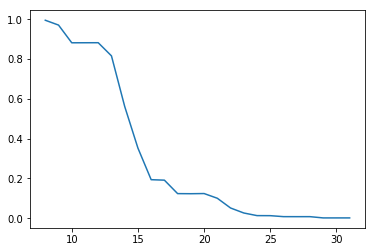

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

sample = {8: 0.995584, 9: 0.971275, 10: 0.882199, 11: 0.882404, 12: 0.882586, 13: 0.81644, 14: 0.56212, 15: 0.352757, 16: 0.19386, 17: 0.191458, 18: 0.123785, 19: 0.123297, 20: 0.124158, 21: 0.10045, 22: 0.051487, 23: 0.026387, 24: 0.013172, 25: 0.01291, 26: 0.008001, 27: 0.007884, 28: 0.007944, 29: 0.001609, 30: 0.001619, 31: 0.001641} #, 32: 0.000822, 33: 0.0007871, 34: 0.0004914, 35: 0.0004915}
hash_sample = {key: round(1/value,5) for (key,value) in sample.items()}
hash_array= np.array([round(1/sample[key],5) for key in sample]).reshape(-1,8)
sample_array=np.array(sample).reshape(3,8)
print([round(1/sample[key],5) for key in sample])
print(hash_array)
# hash_sample = 
diff = np.array([i for i in sample])
prob = np.array([sample[i] for i in sample])

print(diff)
print(prob)
plt.plot(diff,prob)


In [13]:
import numpy as np
from datetime import datetime

hex_dict = {
    '0': '00110000',
    '1': '00110001',
    '2': '00110010',
    '3': '00110011',
    '4': '00110100',
    '5': '00110101',
    '6': '00110110',
    '7': '00110111',
    '8': '00111000',
    '9': '00111001',
    'a': '01101010',
    'b': '01101011',
    'c': '01101100',
    'd': '01101101',
    'e': '01101110',
    'f': '01101111',
}

def bin_convert(string):
    return ''.join(format(ord(x), '8b').replace(' ', '0') for x in string)

diff_list = [8,16,24,32,48]
N=56
thehash = '033945947123ee5c7987de27c3b848876a28d53709f951bd01f3785e'

#expected_prob8=1 - (15/16) ** 56
def hex_diff():
    for diff in diff_list:
        k=diff // 8
        mining_condition=thehash[0:diff // 8]
        n=500000
        count=0
        for _ in range(0,n):
            sha_array = np.random.randint(0, 16, 56)
            bin_string=''.join([hex(element)[2:] for element in sha_array])
            if mining_condition in bin_string:
                count+=1
        print(f'for diff {diff} : {count/n}, expected: {(N-k+1) * 16**(N-k)/16**N},'
              f'error: {(N-k+1) * 16**(N-k)/16**N / (count/n)} ')

def bin_diff(diff_array):
    result_dict = {}
    for diff in diff_array:
        start_time = datetime.now().timestamp()
        print(f'Starting caluclations for diff: {diff}')
        mining_condition=bin_convert(thehash)[0:diff]
        n=4* 10 ** 7
        count=0
        for i in range(1,n+1):
            if i % (n // 10) == 0:
                print(f'Progress {int(100*(i / n))}% in {int(datetime.now().timestamp() - start_time)}s')
            sha_array = np.random.randint(0, 16, 56)
            hex_string=''.join([hex(element)[2:] for element in sha_array])
            bin_string=bin_convert(hex_string)
            if mining_condition in bin_string:
                count+=1
        print(f'for diff {diff} : {count/n}')
        result_dict[diff] = count/n
    print(result_dict)

bin_diff([33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])


Starting caluclations for diff: 33
Progress 10% in 203s
Progress 20% in 404s
Progress 30% in 604s
Progress 40% in 804s
Progress 50% in 1005s
Progress 60% in 1205s
Progress 70% in 1411s
Progress 80% in 1616s
Progress 90% in 1823s
for diff 33 : 0.000790325
Starting caluclations for diff: 34
Progress 10% in 2241s
Progress 20% in 2461s
Progress 30% in 2691s
Progress 40% in 2922s
Progress 50% in 3154s
Progress 60% in 3384s
Progress 70% in 3613s
Progress 80% in 3840s
Progress 90% in 4073s
for diff 34 : 0.0004953
Starting caluclations for diff: 35
Progress 10% in 4522s
Progress 20% in 4742s
Progress 30% in 4961s
Progress 40% in 5181s
Progress 50% in 5401s
Progress 60% in 5620s
Progress 70% in 5842s
Progress 80% in 6062s
Progress 90% in 6286s
for diff 35 : 0.00049805
Starting caluclations for diff: 36
Progress 10% in 6739s
Progress 20% in 6968s
Progress 30% in 7195s
Progress 40% in 7421s
Progress 50% in 7648s
Progress 60% in 7877s
Progress 70% in 8105s
Progress 80% in 8333s
Progress 90% in 856

In [3]:
from datetime import datetime

for diff 33 : 0.000790325
for diff 34 : 0.0004953
for diff 35 : 0.00049805
for diff 36 : 0.00050095
for diff 37 : 0.0003967
for diff 38 : 0.000200775
for diff 39 : 9.8725e-05
for diff 40 : 4.79e-05
for diff 41 : 4.9825e-05
for diff 42 : 3.125e-05
for diff 43 : 3.075e-05
for diff 44 : 3.0425e-05
for diff 45 : 2.56e-05
for diff 46 : 1.2025e-05
for diff 47 : 5.8e-06
Starting caluclations for diff: 47
Progress 10% in 31666s


In [10]:
%%timeit
def KnuthMorrisPratt(text, pattern):

    '''Yields all starting positions of copies of the pattern in the text.
Calling conventions are similar to string.find, but its arguments can be
lists or iterators, not just strings, it returns all matches, not just
the first one, and it does not need the whole text in memory at once.
Whenever it yields, it will have read the text exactly up to and including
the match that caused the yield.'''

    # allow indexing into pattern and protect against change during yield
    pattern = list(pattern)

    # build table of shift amounts
    shifts = [1] * (len(pattern) + 1)
    shift = 1
    for pos in range(len(pattern)):
        while shift <= pos and pattern[pos] != pattern[pos-shift]:
            shift += shifts[pos-shift]
        shifts[pos+1] = shift

    # do the actual search
    startPos = 0
    matchLen = 0
    for c in text:
        while matchLen == len(pattern) or \
              matchLen >= 0 and pattern[matchLen] != c:
            startPos += shifts[matchLen]
            matchLen -= shifts[matchLen]
        matchLen += 1
        if matchLen == len(pattern):
            return True
    return False

thehash = '033945947123ee5c7987de27c3b848876a28d53709f951bd01f3785e'
KnuthMorrisPratt(thehash,'852')

24.3 µs ± 758 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%%timeit
thehash = '033945947123ee5c7987de27c3b848876a28d53709f951bd01f3785e'
'852' in thehash

77.7 ns ± 0.865 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
